In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
master_df_master = pd.read_csv(r'master_df.csv',encoding='latin-1')
master_df_master.head()

,Unnamed: 0,Date,RegionName,Population,Afford_idx,Property_Crimes,Violent_Crimes,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
0,0,2013-01-01,Alameda County,1554138,0.32,1018333,151634,429100.0,8.3,3.41,79.0,2326.0
1,1,2013-02-01,Alameda County,1554138,0.32,1018333,151634,428400.0,7.8,3.53,70.0,2229.0
2,2,2013-03-01,Alameda County,1554138,0.32,1018333,151634,436100.0,7.5,3.57,51.0,2115.0
3,3,2013-04-01,Alameda County,1554138,0.25,1018333,151634,441500.0,7.0,3.45,46.5,2105.0
4,4,2013-05-01,Alameda County,1554138,0.25,1018333,151634,460100.0,7.0,3.54,45.0,2159.0


## 1. Calculate Pearson Correlation Coefficient 

### 1.1. Alameda

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.96 at strongest negative correlation. Mortgage rate has weakest correlation at -0.11. 
Only number of monthly listing in Zillow is over -0.5.  

In [4]:
alameda_df = master_df_master[master_df_master.RegionName=='Alameda County'].copy()
alameda_df.drop(['Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
alameda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 9 columns):
Unnamed: 0             61 non-null int64
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.8+ KB


In [5]:
alam_corr = alameda_df.corr()
alam_corr.head()

,Unnamed: 0,Afford_idx,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
Unnamed: 0,1.000000,-0.402102,0.990129,-0.950989,-0.192906,-0.282861,-0.597537
Afford_idx,-0.402102,1.000000,-0.465295,0.489153,-0.458531,0.607849,0.160462
SalePrice,0.990129,-0.465295,1.000000,-0.959253,-0.109471,-0.317180,-0.556541
UnemployRate,-0.950989,0.489153,-0.959253,1.000000,0.174267,0.339144,0.463926
Rate,-0.192906,-0.458531,-0.109471,0.174267,1.000000,-0.154545,0.053217


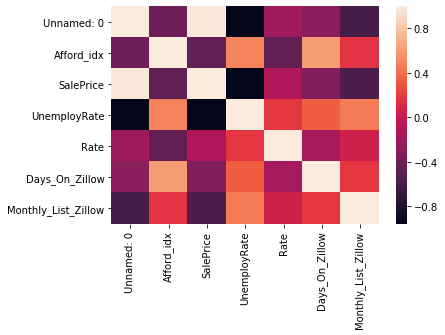

In [6]:
sns.heatmap(alam_corr)

### 1.2. Sacramento

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.95 at strongest negative correlation followed by Affordability indext at -0.89. 
Mortgage rate has weakest correlation at -0.09. 
Surprisingly, for this market, number of days on Zillow has correlation of -0.55 and number of monthly listing in Zillow is at 0.16. 
Just looking at Pearson coffecient, Sacramento market has different characteristics than Alameda. 

In [7]:
sac_df = master_df_master[master_df_master.RegionName=='Sacramento County'].copy()
sac_df.drop(['Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)

In [8]:
sac_corr = sac_df.corr()
sac_corr.head()

,Unnamed: 0,Afford_idx,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
Unnamed: 0,1.000000,-0.840672,0.988656,-0.960814,-0.192906,-0.551340,0.169219
Afford_idx,-0.840672,1.000000,-0.885834,0.867977,-0.069754,0.573252,-0.298230
SalePrice,0.988656,-0.885834,1.000000,-0.953217,-0.097158,-0.553002,0.158407
UnemployRate,-0.960814,0.867977,-0.953217,1.000000,0.204221,0.519833,-0.328659
Rate,-0.192906,-0.069754,-0.097158,0.204221,1.000000,0.010811,-0.278544


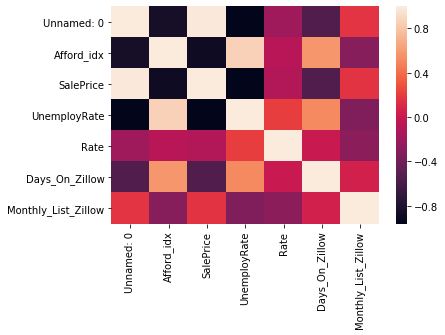

In [9]:
sns.heatmap(sac_corr)

### 1.3. L.A.

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.93 at strongest negative correlation followed by Affordability indext and Monthly listing at -0.67. 
Mortgage rate has weakest correlation at -0.11. 
L.A. is yet again different from Sacramento and Alameda in that affordability index and number of monthly listing is over -0.5.

In [10]:
la_df = master_df_master[master_df_master.RegionName=='Los Angeles County'].copy()
la_df.drop(['Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)

In [11]:
la_corr = la_df.corr()
la_corr.head()

,Unnamed: 0,Afford_idx,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
Unnamed: 0,1.000000,-0.623011,0.977578,-0.962087,-0.192906,-0.185879,-0.638502
Afford_idx,-0.623011,1.000000,-0.674496,0.560784,-0.246446,0.386239,0.300370
SalePrice,0.977578,-0.674496,1.000000,-0.931257,-0.111129,-0.243789,-0.671344
UnemployRate,-0.962087,0.560784,-0.931257,1.000000,0.247941,0.138547,0.518685
Rate,-0.192906,-0.246446,-0.111129,0.247941,1.000000,-0.121567,-0.042807


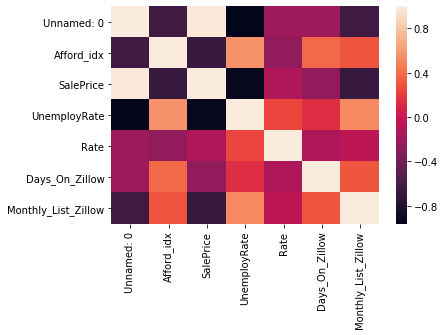

In [12]:
sns.heatmap(la_corr)

## 1.4 Pearson R between counties - Sale Price
Compute how two continuous signals co-vary over time and indicate the linear relationship as a number between -1 (negatively correlated) to 0 (not correlated) to 1 (perfectly correlated). 

Alameda and Sacramento are more more correlated to each other than between LA and Sacramento/Alameda. 


In [13]:
# Alameda vs Sacramento
import scipy.stats as stats

r1, p1 = stats.pearsonr(alameda_df.SalePrice, sac_df.SalePrice)
print(f"Alameda vs Sacramento Sales Price - Scipy computed Pearson r: {r1} and p-value: {p1}")

r2, p2 = stats.pearsonr(alameda_df.SalePrice, la_df.SalePrice)
print(f"Alameda vs LA Sales Price - Scipy computed Pearson r: {r2} and p-value: {p2}")

r3, p3 = stats.pearsonr(sac_df.SalePrice, la_df.SalePrice)
print(f"Sacramento vs LA Sales Price - Scipy computed Pearson r: {r3} and p-value: {p3}")

Alameda vs Sacramento Sales Price - Scipy computed Pearson r: 0.9901329698180913 and p-value: 4.617003021613149e-52
Alameda vs LA Sales Price - Scipy computed Pearson r: 0.984998811732923 and p-value: 1.0015079128758383e-46
Sacramento vs LA Sales Price - Scipy computed Pearson r: 0.9894452006991754 and p-value: 3.3380852906212e-51


### 1.4.1. How about counties around Alameda- how correlated are they? Is Alameda a good example of S.F. Bay area market? 

Surprisingly, Pearson coefficient between Alameda and adjacent counties are lower than Alameda vs Sacramento or LA. 


In [14]:
# get San Mateo, Contra Coasta, Santa Clara county, Marin county data and do KNN analysis

CA_sales_prices = pd.read_excel(r'C:\Users\yulmee\Documents\Yul-Mee\Springboard\Capstone 1\dataset\cleaned\Zillow_Sale_Prices_County_2008_2015_cleaned.xlsx',encoding='latin-1')


# Convert year-month to date instead: 2008-10 to 2008-10-01 and then to datetime type. 
# For my notes - see http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/ 
# section: Use .apply with axis=1 to send every single row to a function
def set_first_of_month(row):
    datestring = row['year-month'] +'-01'
    return datetime.strptime(datestring, '%Y-%m-%d')

# select county data

def get_cleaned_county_sales_price(CA_sales_prices, county_name):

    county_sales_price = CA_sales_prices.loc[CA_sales_prices['RegionName'] == county_name]
    
    # Melt table to get year and month prices as rows. 
    alm_melt = county_sales_price.melt(id_vars=['RegionID', 'RegionName'], var_name='year-month', value_name='SalePrice')
    
    alm_melt['Date']=alm_melt.apply(set_first_of_month, axis=1)
    alm_melt.drop(['year-month', 'RegionID'],axis=1,inplace=True) 

    sales_price_final = alm_melt
    
    return sales_price_final

In [15]:
# Get cleaned sales price data for Santa Clara county
sclara_county_name = 'Santa Clara County'
sclara_sales_price_final = get_cleaned_county_sales_price(CA_sales_prices, sclara_county_name)
sclara_sales_price = sclara_sales_price_final[(sclara_sales_price_final['Date'] > '2012-12-31') & (sclara_sales_price_final['Date'] < '2018-01-31')]
sclara_sales_price.drop(['RegionName'],axis=1,inplace=True) 
sclara_sales_price.reset_index(inplace=True)

# Get cleaned sales price data for Contra Costa county
contra_county_name = 'Contra Costa County' 
contra_sales_price_final = get_cleaned_county_sales_price(CA_sales_prices, contra_county_name)
contra_sales_price = contra_sales_price_final[(contra_sales_price_final['Date'] > '2012-12-31') & (contra_sales_price_final['Date'] < '2018-01-31')]
contra_sales_price.drop(['RegionName'],axis=1,inplace=True) 
contra_sales_price.reset_index(inplace=True)

# Get cleaned sales price data for Marin county
marin_county_name = 'Marin County'
marin_sales_price_final = get_cleaned_county_sales_price(CA_sales_prices, marin_county_name)
marin_sales_price = marin_sales_price_final[(marin_sales_price_final['Date'] > '2012-12-31') & (marin_sales_price_final['Date'] < '2018-01-31')]
marin_sales_price.drop(['RegionName'],axis=1,inplace=True) 
marin_sales_price.reset_index(inplace=True)
 
alameda_temp_df = alameda_df.copy()    
alameda_temp_df['Date']= pd.to_datetime(alameda_temp_df['Date']) 


r_a_s, p_a_s = stats.pearsonr(alameda_df.SalePrice, sclara_sales_price.SalePrice)
print(f"Alameda vs Santa Clara Sales Price - Scipy computed Pearson r: {r_a_s} and p-value: {p_a_s}")

r_a_c, p_a_c = stats.pearsonr(alameda_df.SalePrice, contra_sales_price.SalePrice)
print(f"Alameda vs Contra Costa Sales Price - Scipy computed Pearson r: {r_a_c} and p-value: {p_a_c}")

r_a_m, p_a_m = stats.pearsonr(sac_df.SalePrice, marin_sales_price.SalePrice)
print(f"Alameda vs Marin Sales Price - Scipy computed Pearson r: {r_a_m} and p-value: {p_a_m}")


Alameda vs Santa Clara Sales Price - Scipy computed Pearson r: 0.9751807593094461 and p-value: 2.4653862285179568e-40
Alameda vs Contra Costa Sales Price - Scipy computed Pearson r: 0.974469394516746 and p-value: 5.6184745617655765e-40
Alameda vs Marin Sales Price - Scipy computed Pearson r: 0.943225021570093 and p-value: 6.2840858682738206e-30


C:\Users\yulmee\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## 2. Linear regression
### 2.1. Alameda

1) Monthly_List_Zillow variable which was the only variable other than Unemployment Rate that went over -0.5 Pearson Coefficient. It has slope of 0.

2) Affordability index variable close behind with -0.46. 

slope = -0.0013004829085428203 # of Monthly Listing / SalePrice
intercept = 2944.614179565922 # of Monthly Listing


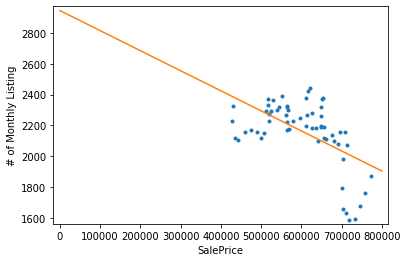

In [16]:
_ = plt.plot(alameda_df.SalePrice, alameda_df.Monthly_List_Zillow, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('# of Monthly Listing')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(alameda_df.SalePrice, alameda_df.Monthly_List_Zillow, 1)

# Print the results to the screen
print('slope =', a, '# of Monthly Listing / SalePrice')
print('intercept =', b, '# of Monthly Listing')

# Make theoretical line to plot
x = np.array([0,800000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


slope = -1.5729156838012416e-07 Affordability Index / SalePrice
intercept = 0.3161463798684897 Affordability Index


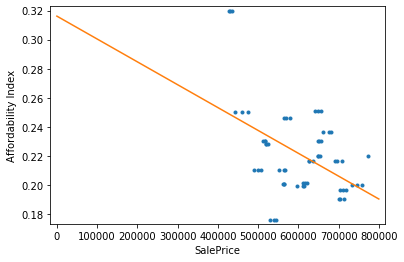

In [17]:
_ = plt.plot(alameda_df.SalePrice, alameda_df.Afford_idx, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(alameda_df.SalePrice, alameda_df.Afford_idx, 1)

# Print the results to the screen
print('slope =', a, 'Affordability Index / SalePrice')
print('intercept =', b, 'Affordability Index')

# Make theoretical line to plot
x = np.array([0,800000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### 2.2. Sacramento

slope = -1.0725467165090528e-06 Affordability Index / SalePrice
intercept = 0.7680755798795135 Affordability Index


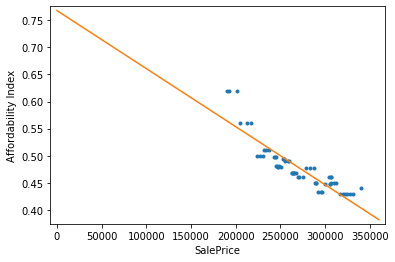

In [18]:
_ = plt.plot(sac_df.SalePrice, sac_df.Afford_idx, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(sac_df.SalePrice, sac_df.Afford_idx, 1)

# Print the results to the screen
print('slope =', a, 'Affordability Index / SalePrice')
print('intercept =', b, 'Affordability Index')

# Make theoretical line to plot
x = np.array([0,360000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### 2.3. L.A.

1) Affordability index and Monthly listing both have pearson coefficient at -0.67.  

slope = -6.719612575602431e-07 Affordability Index / SalePrice
intercept = 0.5987596616729687 Affordability Index


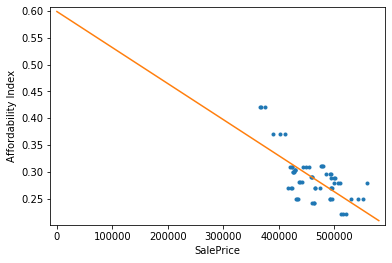

In [19]:
_ = plt.plot(la_df.SalePrice, la_df.Afford_idx, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(la_df.SalePrice, la_df.Afford_idx, 1)

# Print the results to the screen
print('slope =', a, 'Affordability Index / SalePrice')
print('intercept =', b, 'Affordability Index')

# Make theoretical line to plot
x = np.array([0,580000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

slope = -0.02627382234144917 # of Monthly listing / SalePrice
intercept = 30996.13220167387 # of Monthly listing


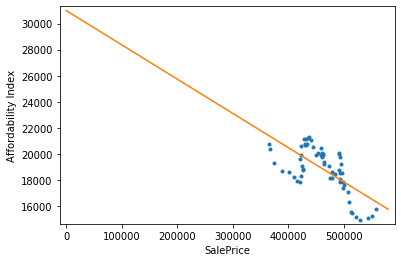

In [20]:
_ = plt.plot(la_df.SalePrice, la_df.Monthly_List_Zillow, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(la_df.SalePrice, la_df.Monthly_List_Zillow, 1)

# Print the results to the screen
print('slope =', a, '# of Monthly listing / SalePrice')
print('intercept =', b, '# of Monthly listing')

# Make theoretical line to plot
x = np.array([0,580000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### 3. Dynamic Time Warping — synchrony of signals varying in lengths. 
#### 3.1. Explore difference in sale price trend between Alameda, Sacramento and L.A.
Also explore difference between sale price trend between Alameda and close counties - Santa Clara, Contra Costa, San Mateo and Marin.   

Synchrony between Sacramento and L.A. seems to be marginally closer than between Alameda and Sacramento. 


In [21]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

alameda_sales = alameda_df.SalePrice.values
sac_sales = sac_df.SalePrice.values
la_sales = la_df.SalePrice.values

distance_a_s, path_a_s = fastdtw(alameda_sales, sac_sales, dist=euclidean)

distance_a_l, path_a_l = fastdtw(alameda_sales, la_sales, dist=euclidean)

distance_s_l, path_s_l = fastdtw(sac_sales, la_sales, dist=euclidean)

print('Distance between Alameda and Scramento Sales: ' + str(distance_a_s))
print('Distance between Alameda and L.A. Sales: ' + str(distance_a_l))
print('Distance between Scramento and L.A. Sales: ' + str(distance_s_l))

Distance between Alameda and Scramento Sales: 20368100.0
Distance between Alameda and L.A. Sales: 4291000.0
Distance between Scramento and L.A. Sales: 11744700.0


## 4. Are there significant differences between subgroups in your data that may be relevant to your project aim?

### 4.1. Alameda - Mortgage rate in early 2013 that could affect slow down in sale price growth starting a month later?

#### 4.1.1. Look at linear regression between change % of sales price and mortgage rate - any changes when mortgage rate is lagged by 1 month? 

In [22]:
# Sales change percentage
alm_saleprice_change_perc=alameda_df.SalePrice.pct_change()
alm_saleprice_change_perc[0] = alm_saleprice_change_perc.mean()    

# Rate change percentage
alm_rate_change_perc=alameda_df.Rate.pct_change()
alm_rate_change_perc[0] = alm_rate_change_perc.mean()    

# Rate change percentage lagged by 1 month
a = pd.Series([alm_rate_change_perc.mean()])
alm_rate_change_perc_delayed = pd.concat([a, alm_rate_change_perc])

alm_rate_change_perc_delayed.drop(alm_rate_change_perc_delayed.tail(1).index,inplace=True) # drop last n rows


slope = 0.8063827062265295 SalePrice % change / Mortgage Rate % change 
intercept = -0.004540489395909135 SalePrice % change


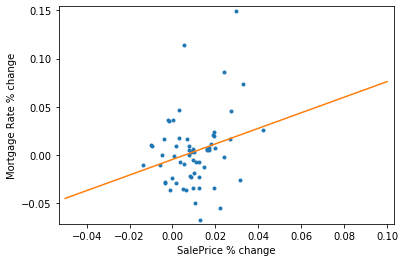

In [23]:
# Linear regression without 1 month lag

_ = plt.plot(alm_saleprice_change_perc, alm_rate_change_perc, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice % change')
_ = plt.ylabel('Mortgage Rate % change')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(alm_saleprice_change_perc, alm_rate_change_perc, 1)

# Print the results to the screen
print('slope =', a, 'SalePrice % change / Mortgage Rate % change ')
print('intercept =', b, 'SalePrice % change')

# Make theoretical line to plot
x = np.array([-0.05,0.1])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


slope = 1.0088399015741774 SalePrice % change / Mortgage Rate % change with lag 
intercept = -0.006823660312656747 SalePrice % change


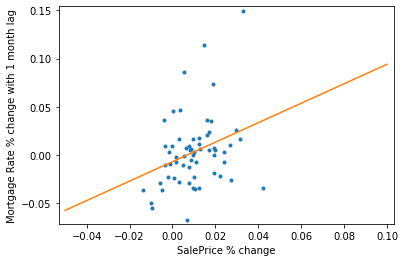

In [24]:
# Linear regression with 1 month lag

_ = plt.plot(alm_saleprice_change_perc, alm_rate_change_perc_delayed, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice % change')
_ = plt.ylabel('Mortgage Rate % change with 1 month lag')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(alm_saleprice_change_perc, alm_rate_change_perc_delayed, 1)

# Print the results to the screen
print('slope =', a, 'SalePrice % change / Mortgage Rate % change with lag ')
print('intercept =', b, 'SalePrice % change')

# Make theoretical line to plot
x = np.array([-0.05,0.1])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

##### 4.1.2. Pearson R coefficient
When Mortgage rate is lagged by 1 month, pearson R coefficient is slightly better than when not lagged. 
Lagging by more than 1 month actually make the R coefficient worse so lagging by 1 month seems to be sweet spot. 

In [25]:

alm_r_sp, alm_p_sp = stats.pearsonr(alm_saleprice_change_perc, alm_rate_change_perc)
print(f"Alameda Sales Price %  change vs Mortgage Rate % change - Scipy computed Pearson r: {alm_r_sp} and p-value: {alm_p_sp}")

alm_r_sp_lag, alm_p_sp_lag = stats.pearsonr(alm_saleprice_change_perc, alm_rate_change_perc_delayed)
print(f"Alameda Sales Price %  change vs Mortgage Rate % change with 1 month lag- Scipy computed Pearson r: {alm_r_sp_lag} and p-value: {alm_p_sp_lag}")
 

Alameda Sales Price %  change vs Mortgage Rate % change - Scipy computed Pearson r: 0.24567733463108074 and p-value: 0.05633078225932022
Alameda Sales Price %  change vs Mortgage Rate % change with 1 month lag- Scipy computed Pearson r: 0.3078905622746326 and p-value: 0.01578229301141286


In [26]:
# Lag by 2 months instead
# Rate change percentage lagged by 2 month
a3 = pd.Series([alm_rate_change_perc.mean(),alm_rate_change_perc.mean()])
alm_rate_change_perc_delayed_2 = pd.concat([a3, alm_rate_change_perc])

alm_rate_change_perc_delayed_2.drop(alm_rate_change_perc_delayed.tail(2).index,inplace=True) # drop last n rows

alm_r_sp_lag2, alm_p_sp_lag2 = stats.pearsonr(alm_saleprice_change_perc, alm_rate_change_perc_delayed_2)
print(f"Alameda Sales Price %  change vs Mortgage Rate % change with 2 month lag- Scipy computed Pearson r: {alm_r_sp_lag2} and p-value: {alm_p_sp_lag2}")


Alameda Sales Price %  change vs Mortgage Rate % change with 2 month lag- Scipy computed Pearson r: 0.1501798047758495 and p-value: 0.24799128380027452


In [27]:
# Lag by 3 months instead
# Rate change percentage lagged by 3 month
a3 = pd.Series([alm_rate_change_perc.mean(),alm_rate_change_perc.mean(),alm_rate_change_perc.mean()])
alm_rate_change_perc_delayed_3 = pd.concat([a3, alm_rate_change_perc])

alm_rate_change_perc_delayed_3.drop(alm_rate_change_perc_delayed.tail(3).index,inplace=True) # drop last n rows

alm_r_sp_lag3, alm_p_sp_lag3 = stats.pearsonr(alm_saleprice_change_perc, alm_rate_change_perc_delayed_3)
print(f"Alameda Sales Price %  change vs Mortgage Rate % change with 3 month lag- Scipy computed Pearson r: {alm_r_sp_lag3} and p-value: {alm_p_sp_lag3}")

Alameda Sales Price %  change vs Mortgage Rate % change with 3 month lag- Scipy computed Pearson r: 0.12476599869562799 and p-value: 0.3380402782334271
